In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [5]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

Epoch 1/10
1500/1500 [==============================] - 5s 2ms/step - loss: 0.2716 - accuracy: 0.9208 - val_loss: 0.1567 - val_accuracy: 0.9513
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1147 - accuracy: 0.9651 - val_loss: 0.1104 - val_accuracy: 0.9669
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0787 - accuracy: 0.9762 - val_loss: 0.0981 - val_accuracy: 0.9708
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0600 - accuracy: 0.9810 - val_loss: 0.0866 - val_accuracy: 0.9742
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0996 - val_accuracy: 0.9703
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0389 - accuracy: 0.9871 - val_loss: 0.1023 - val_accuracy: 0.9718
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0913 - val_accuracy:

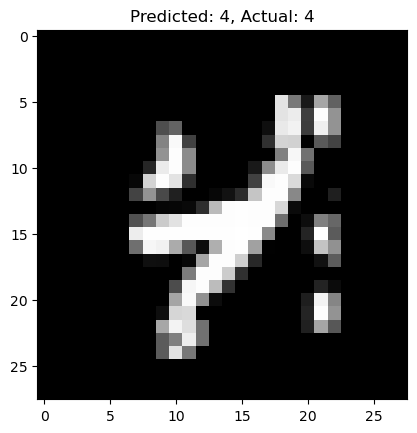

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
predictions = model.predict(x_test)
# Display a random test image along with its predicted and actual labels
index = np.random.randint(0, x_test.shape[0])
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {np.argmax(y_test[index])}")
plt.show()